In [1]:
#####Importing Libraries#####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#####Reading Dataset#####
raw_data = pd.read_csv("housing_price_prediction.csv")
raw_data.head(15)

,Price,sqft
0,13.5,500
1,14.0,510
2,14.1,512
3,14.8,520
4,15.1,530
5,15.3,540
6,15.5,550
7,13.8,500
8,13.9,510
9,14.0,510


In [3]:
#####Describing the data#####
raw_data.describe()

,Price,sqft
count,209.000000,209.000000
mean,23.866411,906.947368
std,6.060221,265.128710
min,13.500000,500.000000
25%,17.880000,682.000000
50%,24.800000,880.000000
75%,29.400000,1140.000000
max,33.000000,1398.000000


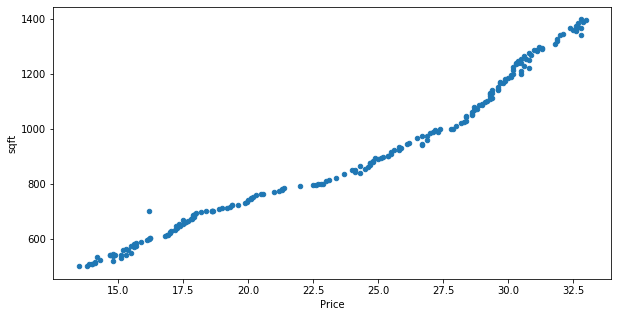

In [4]:
#####Plotting the Data--Before Normalization#####
raw_data.plot(kind='scatter',x='Price',y='sqft',figsize=(10,5))

In [5]:
#####Normalizing the Data---Feaure Scaling#####
data=(raw_data-raw_data.mean())/(raw_data.max()-raw_data.min())
data.head()

,Price,sqft
0,-0.531611,-0.453171
1,-0.505970,-0.442035
2,-0.500842,-0.439808
3,-0.464944,-0.430899
4,-0.449560,-0.419763


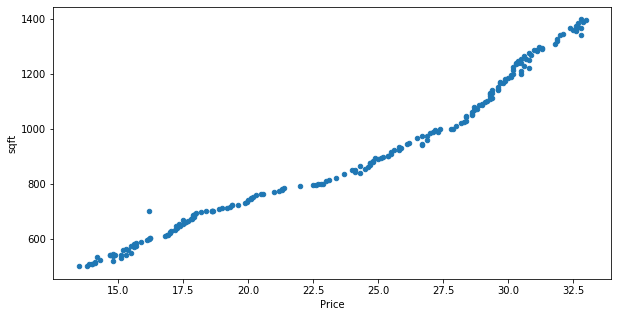

In [6]:
#####Plotting the Data After Normalizing#####
raw_data.plot(kind='scatter',x='Price',y='sqft',figsize=(10,5))

In [7]:
#####Finding the shape of Data#####
data.shape
## ie m= 97 (no of Rows)##

(209, 2)

In [8]:
### Inserting Ones - Data Preprocessing ###
data.insert(0,'Ones',1)
data.head(15)

,Ones,Price,sqft
0,1,-0.531611,-0.453171
1,1,-0.505970,-0.442035
2,1,-0.500842,-0.439808
3,1,-0.464944,-0.430899
4,1,-0.449560,-0.419763
5,1,-0.439303,-0.408627
6,1,-0.429047,-0.397492
7,1,-0.516226,-0.453171
8,1,-0.511098,-0.442035
9,1,-0.505970,-0.442035


In [9]:
data.head(15)


,Ones,Price,sqft
0,1,-0.531611,-0.453171
1,1,-0.505970,-0.442035
2,1,-0.500842,-0.439808
3,1,-0.464944,-0.430899
4,1,-0.449560,-0.419763
5,1,-0.439303,-0.408627
6,1,-0.429047,-0.397492
7,1,-0.516226,-0.453171
8,1,-0.511098,-0.442035
9,1,-0.505970,-0.442035


In [10]:
cols = data.shape[1]
print(cols)

3


In [11]:
## Separating X and Y from Data ##
x = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [12]:
## Converting Data into Matrix for Computation ##
x = np.matrix(x)
y = np.matrix(y)
theta = np.matrix(np.array([0,0]))

In [13]:
#####Finding the shape of Data#####
x.shape,theta.shape,y.shape

((209, 2), (1, 2), (209, 1))

In [14]:
## Defining cost function ##
def computeError(x,y,theta):
    inner = np.power(((x*theta.T)-y),2)
    return np.sum(inner)/(2*len(x))

In [15]:
## Computing cost Function (Error) ##
computeError(x,y,theta)

0.043375839861990395

In [16]:
##### Defining Gradient Descent ######
learn_rate = 1

In [17]:
iters = 200

In [18]:
def gradientDescent(x,y,theta,learn_rate,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (x * theta.T)-y
        for j in range(parameters):
            term = np.multiply(error,x[:,j])
            temp[0,j] = theta[0,j]-((learn_rate/len(x))*np.sum(term))
        theta = temp
        cost[i] = computeError(x,y,theta)
    return theta,cost

In [19]:
########## Computing Gradient Descent #######
new_theta, cost = gradientDescent(x,y,theta,learn_rate,iters)
print(new_theta,cost)

[[4.27754589e-16 9.33450898e-01]] [0.03571209 0.02945084 0.02433543 0.02015618 0.01674175 0.01395217
 0.01167311 0.00981112 0.00828989 0.00704705 0.00603166 0.00520209
 0.00452434 0.00397062 0.00351823 0.00314863 0.00284667 0.00259997
 0.00239842 0.00223375 0.00209922 0.00198931 0.00189951 0.00182615
 0.00176621 0.00171724 0.00167723 0.00164455 0.00161784 0.00159603
 0.0015782  0.00156364 0.00155174 0.00154202 0.00153408 0.00152759
 0.00152229 0.00151796 0.00151442 0.00151153 0.00150917 0.00150724
 0.00150567 0.00150438 0.00150333 0.00150247 0.00150176 0.00150119
 0.00150072 0.00150034 0.00150002 0.00149977 0.00149956 0.00149939
 0.00149925 0.00149914 0.00149904 0.00149897 0.00149891 0.00149885
 0.00149881 0.00149878 0.00149875 0.00149873 0.00149871 0.0014987
 0.00149868 0.00149867 0.00149866 0.00149866 0.00149865 0.00149865
 0.00149864 0.00149864 0.00149864 0.00149864 0.00149864 0.00149863
 0.00149863 0.00149863 0.00149863 0.00149863 0.00149863 0.00149863
 0.00149863 0.00149863 0.0014

In [20]:
### Comput Error after Gradient Descent ###
computeError(x,y,new_theta)

0.0014986278721006632

In [21]:
#### predicting the model using new theta ####
x = data.Price
print(x)


0     -0.531611
1     -0.505970
2     -0.500842
3     -0.464944
4     -0.449560
         ...   
204    0.463261
205    0.442748
206    0.468389
207    0.458133
208    0.447876
Name: Price, Length: 209, dtype: float64


In [22]:
Model_price = new_theta[0,0]+ (new_theta[0,1]*x)

Text(0.5, 1.0, 'Predcited SQFT vs Price')

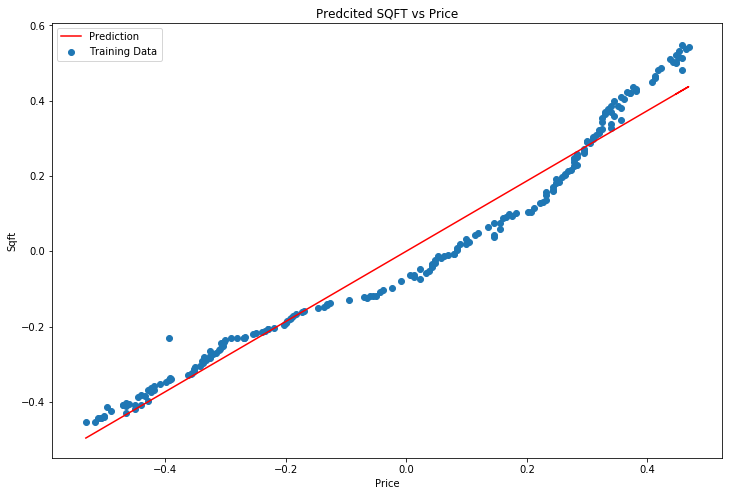

In [23]:
###  Plotting the model ####
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x,Model_price,'r',label='Prediction')
ax.scatter(data.Price,data.sqft,label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Price')
ax.set_ylabel('Sqft')
ax.set_title('Predcited SQFT vs Price')

Text(0.5, 1.0, 'Error vs. Iterations')

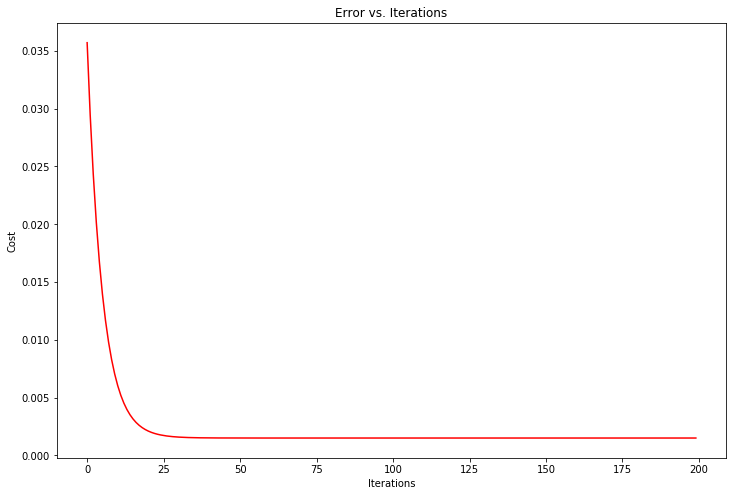

In [24]:
### Error Vs Iteration ####
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Iterations')

In [25]:
### Accuracy #####
import math
erro_r = [np.power((b-a),2) for (a,b) in zip(Model_price ,y)]  #mean absolute percentage error
error0 = np.sum(erro_r)
error = (error0/len(y))*100
print("error % ={}".format(error))
accuracy = 100-error
print("accuracy%={}".format(accuracy))

error % =0.29972557442013265
accuracy%=99.70027442557986


In [26]:
### Define Prediction  ####
def predict(new_theta,accuracy):
    #get input from the user
    price = float(input("Enter the Price of the House (In lakhs):"))
    #mean Normalization
    price = (price - raw_data.Price.mean())/(raw_data.Price.max()-raw_data.Price.min())
    #model
    size = (new_theta[0,0]+(new_theta[0,1]*price))
    #Reverse MEan Normalization
    Predicted_Size = (size*(raw_data.sqft.max()-raw_data.sqft.min()))+(raw_data.sqft.mean())
    Size_at_Max_Accuracy = (Predicted_Size*(1/accuracy)*100)
    Size_range = Size_at_Max_Accuracy - Predicted_Size
    return Predicted_Size, Size_range

In [30]:
#### Final Prediction based on Univariate Regression ##########
Predicted_Size, Size_range = predict(new_theta,accuracy)
print('Your house Size is == '+str(Predicted_Size)+' Sqft '+'(+ or -) '+str(Size_range)+' Sqft')

Enter the Price of the House:12
Your house Size is == 396.85055919090865 Sqft (+ or -) 1.1930384595002579 Sqft
